In [ ]:
# Submission Information:

### Team Member 1:
* UNI:  
* Name:

### Team Member 2 [optional]:
* UNI:  
* Name:

# Step0 - Import Libraries, Load Data [0 points]

This is the basic step where you can load the data and create train and test sets for internal validation as per your convinience.

In [ ]:
#write code below, you can make multiple cells

In [193]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import FunctionTransformer
from sklearn.calibration import CalibratedClassifierCV
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [194]:
data = pd.read_csv('./data/data.csv')
holdout = pd.read_csv('./data/holdout.csv')
ID = holdout[['ID']].copy().astype(int)
del holdout['ID']
data

,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,...,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,41.0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,...,2.0,999,0,nonexistent,-1.695118,92.698705,-46.727552,1.345160,5097.0,no
1,46.0,entrepreneur,married,unknown,no,no,no,cellular,may,wed,...,2.0,999,0,nonexistent,-1.767159,92.914878,-46.313088,1.314499,5100.0,no
2,56.0,unemployed,married,basic.9y,no,yes,yes,cellular,nov,fri,...,1.0,999,0,nonexistent,-0.100365,93.423076,-41.904559,4.003471,5193.0,no
3,89.0,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,...,4.0,999,0,nonexistent,-1.771314,93.672814,-46.045500,1.261668,5100.0,no
4,34.0,entrepreneur,married,university.degree,unknown,yes,no,cellular,jul,thu,...,8.0,999,0,nonexistent,1.458103,94.296285,-42.455877,5.152077,5233.0,no
5,33.0,technician,married,basic.6y,no,no,no,telephone,jun,mon,...,3.0,999,0,nonexistent,1.498926,97.710487,-42.994167,5.017193,5231.0,no
6,38.0,services,married,high.school,unknown,yes,no,telephone,jul,mon,...,3.0,999,0,nonexistent,1.486893,93.501526,-42.901180,4.908002,5226.0,no
7,45.0,management,married,high.school,no,yes,no,cellular,nov,wed,...,1.0,999,0,nonexistent,0.013151,95.912371,-41.597353,4.145364,5192.0,no
8,23.0,admin.,married,high.school,no,no,no,cellular,jul,mon,...,4.0,999,0,nonexistent,1.464003,93.167350,-42.664099,4.929027,5232.0,no
9,35.0,management,married,university.degree,no,yes,yes,cellular,jul,fri,...,1.0,999,0,nonexistent,1.487322,95.122060,-42.143714,4.866617,5236.0,no


In [195]:
dict_features = {}
#key_values = []
with open('./data/data_dictionary_processed.txt','r') as dic:
    for line in dic:
        split = line.split('-')
        if len(split) > 1:
            key_value = split[1].split(':', 1)
            #key_values.append(key_value)
            dict_features[key_value[0].strip(' ')] = key_value[1].strip('\n')
#key_values
dict_features

{'age': ' age (numeric)',
 'campaign': ' number of contacts performed during this campaign and for this client (numeric, includes last contact)',
 'cons_conf_idx': ' consumer confidence index ',
 'cons_price_idx': ' consumer price index ',
 'contact': ' contact communication type (categorical: "cellular","telephone") ',
 'credit_default': ' has credit in default? (categorical: "no","yes","unknown")',
 'day_of_week': ' last contact day of the week (categorical: "mon","tue","wed","thu","fri")',
 'duration': ' last contact duration, in seconds (numeric).',
 'education (categorical': ' "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")',
 'emp_var_rate': ' employment variation rate ',
 'euribor3m': ' euribor 3 month rate ',
 'housing': ' has housing loan? (categorical: "no","yes","unknown")',
 'job': ' type of job (categorical: "admin.","blue',
 'loan': ' has personal loan? (categorical: "no","yes","unknown")',
 'marital_status'

In [147]:
#np.histogram(data['prev_days'].dropna().values, bins = 4)
def digitize(data):
    data['prev_days_bins'] = data['prev_days'].copy()
    prev_days = data['prev_days']
    bins = [  0.  ,   6.75,  13.5 ,  20.25,  27. , 1000 ] 
    data['prev_days_bins'] = np.digitize(prev_days.values, bins = bins)
    del data['prev_days']
    return data
#data['prev_days_bins']

In [148]:
data = digitize(data)
holdout = digitize(holdout)

In [196]:
def remove_unwanted_features(X):
    if('duration' in list(X.columns)):
        del X['duration']
    

In [197]:
features = list(data.keys())#.remove('subscribed')
features.remove('subscribed')
X = data[features]
#remove duration which won't be available
remove_unwanted_features(X)
remove_unwanted_features(holdout)
features = list(X.keys())

y = data['subscribed']
y = y.apply(lambda x: 1 if x == 'yes' else 0)
cat_features = ['contact', 'credit_default', 'day_of_week', 'housing', 'job', 'loan', 'marital_status', 'month'
               , 'prev_outcomes', 'education', 'prev_contacts' ]
continuous_features = list(set(list(X.keys())) - set(cat_features))
y.loc[y == 1].count()/ y.loc[y == 0].count()
#len(continuous_features)
#X_cont = X[continuous_features].astype(float)
#X.loc[:,continuous_features] = X_cont



0.12695806826732334

# Step1 - Exploration and Preparation [10 points]

In this step, we expect you to look into the data and try to understand it before modeling. This understanding may lead to some basic data preparation steps which are common across the two model sets required.

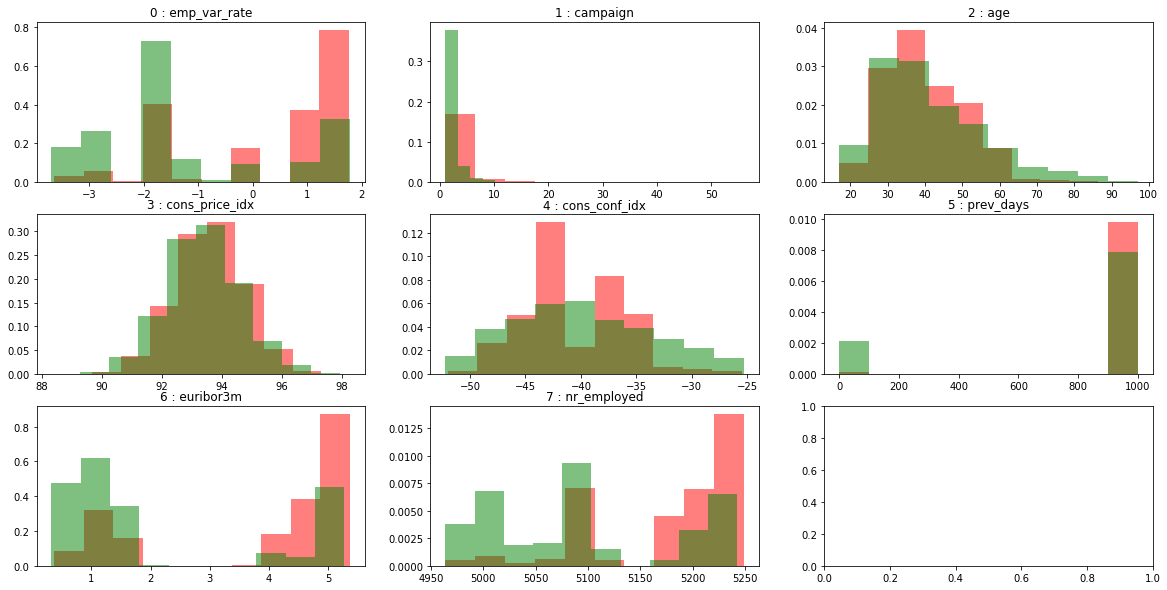

In [198]:
#write code below, you can make multiple cells
#len(cat_features)
f, axarr = plt.subplots(3,3, figsize=(20, 10))
for i in range(len(continuous_features)):
    axarr[i //3, i%3].hist(X[continuous_features[i]][y == 0].dropna(), alpha = .5, color = 'r', normed = 1 )
    axarr[i //3, i%3].hist(X[continuous_features[i]][y == 1].dropna(), alpha = .5, color = 'g', normed = 1 )#
    axarr[i //3, i%3].set_title("{} : {}".format(i, continuous_features[i]))

    
plt.show()

In [201]:
discrete_features_index = [i for i, j in enumerate(features) if j in cat_features]
def label_encoding(X):
    X_encoded = X.copy()
    for f in cat_features:
        le = LabelEncoder()
        X_encoded[f] = le.fit_transform(X_encoded[f])
    return X_encoded

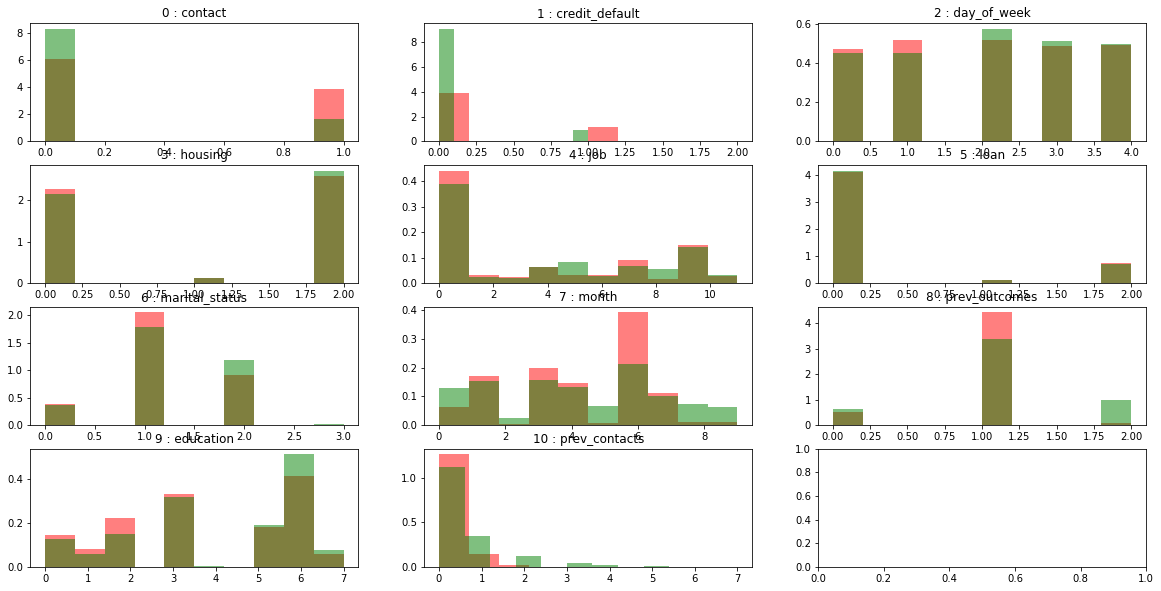

In [202]:

#discrete_features_boolean, features
#mutual_info_classif(X, y, discrete_features_index)

X_encoded = label_encoding(X)
holdout_encoded = label_encoding(holdout)

#X_encoded
f, axarr = plt.subplots(4,3, figsize=(20, 10))
for i in range(len(cat_features)):
    axarr[i //3, i%3].hist(X_encoded[cat_features[i]][y == 0].dropna(), alpha = .5, color = 'r', normed = 1 )
    axarr[i //3, i%3].hist(X_encoded[cat_features[i]][y == 1].dropna(), alpha = .5, color = 'g', normed = 1 )
    axarr[i //3, i%3].set_title("{} : {}".format(i, cat_features[i]))

    
plt.show()

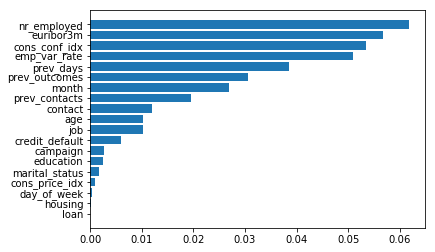

In [203]:
mi = mutual_info_classif(X_encoded, y, discrete_features = [discrete_features_index])
inds = np.argsort(mi)

plt.figure()
plt.barh(np.arange(len(mi)), mi[inds] )
plt.yticks(np.arange(len(mi)), X_encoded.columns[inds]);


In [204]:
best_features = X.columns[inds][:11]
cat_best_features = [x for x in best_features if x in cat_features]
#cat_best_features
X_encoded_best = X_encoded[best_features]

<Container object of 61 artists>

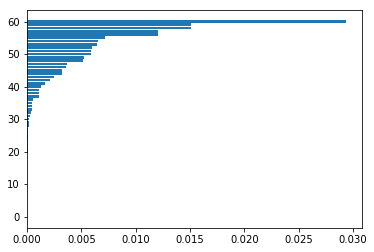

In [205]:
encoder = OneHotEncoder( handle_unknown = 'ignore')
X_one_hot_encoded = encoder.fit_transform(X_encoded[cat_features])
mi = mutual_info_classif(X_one_hot_encoded, y)
inds = np.argsort(mi)

plt.figure()
plt.barh(np.arange(len(mi)), mi[inds] )
#plt.yticks(np.arange(len(mi)), X_one_hot_encoded.columns[inds]);

In [121]:
####Plotting of features expansions with polynomial
''''
def poly_onehot_process_data(X_rdy,y, ):
    
    

    
    mi = mutual_info_classif(X_rdy, y)
    
    colnames = X_rdy.columns
    for f in range(len(mi)):
        if mi[f] < 0.013:
            del X_rdy[colnames[f]]
            
    poly = PolynomialFeatures(2)
    X_poly = pd.DataFrame(poly.fit_transform(X_rdy))
    
    mi_poly = mutual_info_classif(X_poly, y)
    
    colnames_poly = X_poly.columns
    for f in range(len(mi_poly)):
        if mi_poly[f] < 0.01:
            del X_poly[colnames_poly[f]]
            
    return X_poly
''''

In [157]:
#X_poly = poly_onehot_process_data(X_encoded,y)
X_train, X_test,y_train, y_test = train_test_split(X_encoded,y, stratify=y)  
X_train_enc, X_test_enc = count_enc(X_train, X_test, y_train, cat_features)
X_plot= pd.DataFrame(PCA(n_components=2).fit_transform(X_train_enc), columns = ['0', '1'])

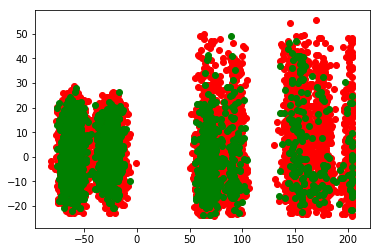

In [158]:
pos = np.array(y.loc[y==1].index.tolist())
neg = np.array(y.loc[y==0].index.tolist())
plt.scatter(X_plot['0'][neg], X_plot['1'][neg], color = 'r')
plt.scatter(X_plot['0'][pos], X_plot['1'][pos], color = 'g')
plt.show()


# Step2 - ModelSet1 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set1:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. Any classification algorithm covered in class apart from tree-based models can be tested here.

In [ ]:
#write code below, you can make multiple cells

In [90]:
####Count-based encoded ( little bit of information leaking for cross validation estimation of best parameters)
def count_enc(X_train, X_test, y_train, cat_features):
    X_train_enc = X_train.copy()
    X_test_enc = X_test.copy()
    y_temp = pd.DataFrame(y_train, columns = ['subscribed'])
    data_train = pd.concat([X_train_enc, y_temp], axis=1, join='inner')
    for i in range(len(cat_features)):
        counts = data_train.groupby([cat_features[i]], as_index=False)['subscribed'].mean()
        data_train['{}_enc'.format(cat_features[i])] = data_train[[cat_features[i]]].applymap(lambda x : counts['subscribed'][x] if x in list(counts.index) else .5)

        X_test_enc['{}_enc'.format(cat_features[i])] = X_test_enc[[cat_features[i]]].applymap(lambda x : counts['subscribed'][x] if x in list(counts.index) else .5)

        del data_train[cat_features[i]]
        del X_test_enc[cat_features[i]]
    features_enc = list(data_train.keys())
    features_enc.remove('subscribed')
    X_train_enc = data_train[features_enc]
    X_train_enc.shape, X_test_enc.shape
    return X_train_enc, X_test_enc



In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X_encoded,y, stratify=y)    
np.sort(list(X_train.index)), np.sort(list(y_train.index))
rus =RandomUnderSampler(ratio = 'auto', replacement = False)
X_train_subsample, y_train_subsample = rus.fit_sample(X_train.dropna(), y_train[list(X_train.dropna().index)])
X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)
#y_train_subsample = pd.Series(y_train_subsample)
#y_train

In [ ]:
X_train_enc, X_test_enc = count_enc(X_train, X_test, y_train, cat_best_features)

In [ ]:
##Knn Classifier

#mapper = DataFrameMapper([(cat_features, Imputer(strategy = 'most_frequent'))\
#    , (continuous_features, Imputer(strategy='mean'))])
#encoder = OneHotEncoder(categorical_features = [True if x in cat_features else False for x in list(X.keys())] )
scaler = StandardScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([ ('scaler', scaler), ('knn', knn)])
param_grid = {'knn__n_neighbors' : range(1,20)}
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_enc, y_train)
grid.best_params_, grid.best_score_
#pipe.fit(X_train, np.ones((X_train.shape[0],1)))
#pipe.predict(X_test)
#X_train.shape[0]

In [ ]:
scaler = StandardScaler(with_mean= False)
knn = KNeighborsClassifier(n_neighbors=16)
imputer = Imputer(strategy='mean')
pipe = Pipeline([ ('scaler', scaler), ('knn', knn)])
pipe.fit(X_train_enc, y_train)
y_hat = pipe.predict(X_test_enc)
roc_auc_score(y_hat, y_test)

In [ ]:
###SVM Gaussian Kernel
X_train, X_test,y_train, y_test = train_test_split(X_encoded,y, stratify=y)    
np.sort(list(X_train.index)), np.sort(list(y_train.index))
rus =RandomUnderSampler(ratio = 'auto', replacement = False)
X_train_subsample, y_train_subsample = rus.fit_sample(X_train.dropna(), y_train[list(X_train.dropna().index)])
X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)

In [ ]:
X_train_enc, X_test_enc = count_enc(X_train, X_test, y_train, cat_best_features)
#X_train.shape, y_train.shape

In [ ]:
###SVM Gaussian Kernel
#svm = SVC(kernel = 'rbf', gamma = 1/X_train.shape[0])
logit = LogisticRegression()
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
sampler = RBFSampler(gamma = 1./(X_train.shape[0]*X_train.std()))
scaler = StandardScaler(with_mean= False)
pipe = Pipeline([('encoder', encoder),('scaler', scaler), ('sampler', sampler), ('logit', logit)])
param_grid = {'sampler__n_components': np.logspace(1,4,10), 'logit__C' : np.logspace(-3,2,6)}
grid = GridSearchCV(pipe, param_grid = param_grid, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_



In [ ]:
#X_train.std()
gamma = 1./(X_train_enc.shape[1]*X_train_enc.std().mean())
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
sampler = RBFSampler(gamma = gamma, n_components = 5000)
X_rbf = sampler.fit_transform(X_train_enc[continuous_features])
X_rbf.shape

In [ ]:
svm = SVC(C = 10.0, kernel = 'rbf')
#gamma = 1./(X_train.shape[1]*X_train.std().mean())
#logit = LogisticRegression()
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#sampler = RBFSampler(gamma = gamma, n_components = 5000)
scaler = StandardScaler(with_mean= False)
pipe = Pipeline([('encoder', encoder), ('scaler', scaler), ('svm', svm)])
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
roc_auc_score(y_hat, y_test)

In [ ]:
####Prediction on holdhout
X_enc, holdout_enc = count_enc(X_encoded, holdout_encoded, y, cat_features)

In [ ]:
holdout_enc.shape, X_enc.shape

In [ ]:
svm = SVC(C = 10.0, kernel = 'rbf', gamma = 1/X_train.shape[0], probability = True)

#mapper = DataFrameMapper([(cat_features, Imputer(strategy = 'most_frequent'))\
#    , (continuous_features, Imputer(strategy='mean'))])
#encoder = OneHotEncoder(categorical_features = [1,2,3,4,5,6,7,8,9,12,13], handle_unknown = 'ignore')
scaler = StandardScaler(with_mean= False)
pipe = Pipeline([ ('scaler', scaler), ('svm', svm)])
pipe.fit(X_enc, y)
y_proba = pipe.predict_proba(holdout_enc)
#roc_auc_score(y_hat, y_test)


In [ ]:
submission = ID.copy()
submission['subscribed'] = y_proba[:,1]
submission.to_csv('svm_prediction.csv', index = False )

In [ ]:
submission
#y_proba

# Step3 - ModelSet2 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set2:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. We encourage you to try decition tree, random forest and gradient boosted tree methods here and pick the one which you think works best.

In [ ]:
#write code below, you can make multiple cells



In [206]:
###Random Forest
X_train, X_test,y_train, y_test = train_test_split(X_encoded,y, stratify=y)    
np.sort(list(X_train.index)), np.sort(list(y_train.index))
rus =RandomUnderSampler(ratio = 'auto', replacement = False)
X_train_subsample, y_train_subsample = rus.fit_sample(X_train.dropna(), y_train[list(X_train.dropna().index)])
X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train,y_train, stratify=y_train) 

In [207]:
#X_train_enc, X_test_enc = count_enc(X_train, X_test, y_train, cat_best_features)
#X_train

In [216]:

forest = RandomForestClassifier(max_depth = 10, n_estimators = 100)
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
pipe = Pipeline([ ('encoder', encoder), ('forest', forest)])
#param_grid = { 'forest__n_estimators': [10,50,100, 300, 500, 700, 1000]}
#grid = GridSearchCV(pipe, param_grid = param_grid, cv=10, scoring='roc_auc')
#grid.fit(X_train, y_train)
#grid.best_params_, grid.best_score_
scores = cross_val_score(pipe, X_encoded, y , cv=10, scoring ='roc_auc')
scores, scores.mean()

(array([ 0.80905245,  0.7950563 ,  0.78736435,  0.79235604,  0.80930104,
         0.78196707,  0.81340777,  0.79892681,  0.7801985 ,  0.80286749]),
 0.79704978074412935)

In [209]:
forest = RandomForestClassifier(max_depth = 15, n_estimators = 100)
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
scaler = StandardScaler(with_mean= False)
pipe = Pipeline([ ('encoder', encoder), ('forest', forest)])

pipe.fit(X_train_sub, y_train_sub)
cal_1 = CalibratedClassifierCV(pipe, cv='prefit', method='sigmoid')
cal_2 = CalibratedClassifierCV(pipe, cv='prefit', method='isotonic')
cal_1.fit(X_val,y_val)
cal_2.fit(X_val,y_val)
y_hat_1 = cal_1.predict_proba(X_test)[:,1]
y_hat_2 = cal_2.predict_proba(X_test)[:,1]
roc_auc_score( y_test, y_hat_1), roc_auc_score( y_test, y_hat_2)

(0.77779140525496482, 0.77570337928675881)

In [ ]:
###GradientBoosting
X_train, X_test,y_train, y_test = train_test_split(X_encoded,y, stratify=y)    
np.sort(list(X_train.index)), np.sort(list(y_train.index))
rus =RandomUnderSampler(ratio = 'auto', replacement = False)
X_train_subsample, y_train_subsample = rus.fit_sample(X_train.dropna(), y_train[list(X_train.dropna().index)])
X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train,y_train, stratify=y_train) 

In [ ]:
gbrt = GradientBoostingClassifier()
pipe = Pipeline([ ('encoder', encoder), ('forest', forest)])

pipe.fit(X_train_sub, y_train_sub)
#y_hat = pipe.predict(X_test)
cal_1 = CalibratedClassifierCV(pipe, cv='prefit', method='sigmoid')
cal_2 = CalibratedClassifierCV(pipe, cv='prefit', method='isotonic')
cal_1.fit(X_val,y_val)
cal_2.fit(X_val,y_val)
y_hat_1 = cal_1.predict_proba(X_test)[:,1]
y_hat_2 = cal_2.predict_proba(X_test)[:,1]
roc_auc_score( y_test, y_hat_1), roc_auc_score( y_test, y_hat_2)


# Step4 - Ensemble [20 points + 10 Bonus points]

In this step, we expect you to use the models created before and create new predictions. You should definitely try poor man's stacking but we encourage you to think of different ensemble techniques as well. We will judge your creativity and improvement in model performance using ensemble models and you can potentially earn 10 bonus points here.

In [ ]:
#write code below, you can make multiple cells
assert True

In [211]:
##############Soft Voting
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
scaler = StandardScaler(with_mean= False)

gbrt = GradientBoostingClassifier()
pipe1 = Pipeline([ ('encoder', encoder), ('forest', forest)])

forest = RandomForestClassifier(max_depth = 15, n_estimators = 100)

pipe2 = Pipeline([ ('encoder', encoder), ('forest', forest)])

logit = LogisticRegression(C=100)
pipe3 = Pipeline([ ('encoder', encoder), ('scaler', scaler), ('forest', forest)])

#knn = KNeighborsClassifier(n_neighbors=16)
#pipe4 = Pipeline([('encoder', encoder), ('scaler', scaler), ('knn', knn)])

voting = VotingClassifier([('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3)], voting='soft')
cross_val_score(voting, X_encoded, y, cv=10, scoring='roc_auc')
#voting.fit(X_train, y_train)
#y_hat = voting.predict(X_test)
#roc_auc_score(y_hat, y_test)

array([ 0.8018751 ,  0.79336378,  0.78989384,  0.79443383,  0.80726749,
        0.78209889,  0.81467343,  0.79191448,  0.77952995,  0.79500532])

In [212]:
##############Soft Voting
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
scaler = StandardScaler(with_mean= False)

gbrt = GradientBoostingClassifier()
pipe1 = Pipeline([ ('encoder', encoder), ('forest', forest)])

forest = RandomForestClassifier(max_depth = 15, n_estimators = 100)

pipe2 = Pipeline([ ('encoder', encoder), ('forest', forest)])

logit = LogisticRegression(C=100)
pipe3 = Pipeline([ ('encoder', encoder), ('scaler', scaler), ('forest', forest)])

#knn = KNeighborsClassifier(n_neighbors=16)
#pipe4 = Pipeline([('encoder', encoder), ('scaler', scaler), ('knn', knn)])

voting = VotingClassifier([('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3)], voting='soft')
voting.fit(X_encoded, y)
y_proba = voting.predict_proba(holdout_encoded)

In [215]:
submission = ID.copy()
submission['subscribed'] = y_proba[:,1]
submission.to_csv('sf_prediction.csv', index = False )

In [214]:
submission

,ID,subscribed
0,2866,0.019283
1,1957,0.032452
2,768,0.047820
3,4510,0.043226
4,7893,0.051887
5,5540,0.061940
6,385,0.151972
7,5152,0.080689
8,1770,0.048876
9,5779,0.032548


In [ ]:
###########Stacking
#voting = VotingClassifier([('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3)], voting='soft')
reshaper = FunctionTransformer(lambda X_: np.rollaxis(X_,1).reshape(-1,6)[:,1::2], validate = False)
stage1 = Pipeline([('voting', voting), ('reshaper', reshaper)])
transform_cv = cross_val_predict(stage1, X_train, y_train, cv=10, method='transform')
stage2 = LogisticRegression(C=100).fit(transform_cv, y_train)
y_hat = stage2.predict(stage1.transform(X_test))
roc_auc_score(y_hat, y_test)

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X_encoded,y, stratify=y)    
np.sort(list(X_train.index)), np.sort(list(y_train.index))
rus =RandomUnderSampler(ratio = 'auto', replacement = False)
X_train_subsample, y_train_subsample = rus.fit_sample(X_train.dropna(), y_train[list(X_train.dropna().index)])
X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train,y_train, stratify=y_train) 

In [ ]:
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
scaler = StandardScaler(with_mean= False)

gbrt = GradientBoostingClassifier()
pipe1 = Pipeline([ ('encoder', encoder), ('forest', forest)])

forest = RandomForestClassifier(max_depth = 15, n_estimators = 100)

pipe2 = Pipeline([ ('encoder', encoder), ('forest', forest)])

logit = LogisticRegression(C=100)
pipe3 = Pipeline([ ('encoder', encoder), ('scaler', scaler), ('forest', forest)])

#knn = KNeighborsClassifier(n_neighbors=16)
#pipe4 = Pipeline([('encoder', encoder), ('scaler', scaler), ('knn', knn)])

voting = VotingClassifier([('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3)], voting='soft')
voting.fit(X_train_sub, y_train_sub)

reshaper = FunctionTransformer(lambda X_: np.rollaxis(X_,1).reshape(-1,6)[:,1::2], validate = False)
stage1 = Pipeline([('voting', voting), ('reshaper', reshaper)])
transform_cv = cross_val_predict(stage1, X_train_sub, y_train_sub, cv=10, method='transform')
stage2 = LogisticRegression(C=100).fit(transform_cv, y_train_sub)
proba_val = stage2.predict(stage1.transform(X_val))
proba_test = stage2.predict(stage1.transform(X_test))
#roc_auc_score(y_hat, y_test)

cal_1 = CalibratedClassifierCV(stage2, cv='prefit', method='sigmoid')
cal_2 = CalibratedClassifierCV(stage2, cv='prefit', method='isotonic')
cal_1.fit(proba_val,y_val)
cal_2.fit(proba_val,y_val)
y_hat_1 = cal_1.predict_proba(proba_test)[:,1]
y_hat_2 = cal_2.predict_proba(proba_test)[:,1]
roc_auc_score( y_test, y_hat_1), roc_auc_score( y_test, y_hat_2)

Bonus credits for resampling methods

In [94]:
####Random Undersampling Random Forest
ratios = [x/10 for x in range(2,10)]
scores = {}
X_train, X_test,y_train, y_test = train_test_split(X_encoded,y, stratify=y)    


In [98]:
for i in range(len(ratios)):
    rus =RandomUnderSampler(ratio = ratios[i], replacement = False)
    X_train_subsample, y_train_subsample = rus.fit_sample(X_train.dropna(), y_train[list(X_train.dropna().index)])
    X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)
    forest = RandomForestClassifier(max_depth = 15, n_estimators = 100)
    encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
    selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
    scaler = StandardScaler(with_mean= False)
    pipe = Pipeline([ ('encoder', encoder), ('forest', forest)])
    pipe.fit(X_train_subsample,y_train_subsample)
    y_proba = pipe.predict_proba(X_test)[:,1]
    scores[ratios[i]] = roc_auc_score(y_test, y_proba)

    

In [99]:
scores

{0.2: 0.79448470446719188,
 0.3: 0.79709066465399303,
 0.4: 0.79502924666257835,
 0.5: 0.79668380583989817,
 0.6: 0.79427891645832338,
 0.7: 0.79089609179678277,
 0.8: 0.79025027713571394,
 0.9: 0.79059758125383262}

In [160]:
#####Edited Nearest Neighbors
scores = {}
X_train, X_test,y_train, y_test = train_test_split(X_encoded,y, stratify=y)

In [161]:

enn = EditedNearestNeighbours(n_neighbors = i)
X_train_subsample, y_train_subsample = enn.fit_sample(X_train, y_train)
X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)
forest = RandomForestClassifier(max_depth = 15, n_estimators = 100)
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
scaler = StandardScaler(with_mean= False)
pipe = Pipeline([ ('encoder', encoder), ('forest', forest)])
pipe.fit(X_train_subsample,y_train_subsample)
y_proba = pipe.predict_proba(X_test)[:,1]
scores[i] = roc_auc_score(y_test, y_proba)

In [162]:
#scores

{1: 0.78983029859899045,
 2: 0.79678463606773908,
 3: 0.79191943016180011,
 4: 0.79101372706259732,
 5: 0.78963925185150241,
 6: 0.79141645832350582,
 7: 0.78984319720269824,
 8: 0.79128120725034201,
 9: 0.78923489905184219,
 10: 0.78796995141280246,
 11: 0.78939793740270769,
 12: 0.78620682284541721,
 13: 0.78746439985376671,
 14: 0.78687644464361528,
 15: 0.78845103247794701,
 16: 0.78792948665031359,
 17: 0.78772023444502093,
 18: 0.78688278338600881,
 19: 0.78697454773810094,
 20: 0.78766937709325902,
 21: 0.7879186518231992,
 22: 0.78637929560356612,
 23: 0.78878565911127885,
 24: 0.78810903521392528,
 25: 0.78687556016793236,
 26: 0.78838381232605315,
 27: 0.78578691801500078,
 28: 0.7876331872965705,
 29: 0.78769229975470534}

In [174]:
enn = EditedNearestNeighbours()
#X_train_subsample, y_train_subsample = enn.fit_sample(X_encoded, y)
#X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)
forest = RandomForestClassifier(max_depth = 15, n_estimators = 100)
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
#scaler = StandardScaler(with_mean= False)
pipe = make_imb_pipeline(enn, encoder, forest)
#pipe.fit(X_train_subsample,y_train_subsample)
param_grid = {'editednearestneighbours__n_neighbors': [1,2,3,5,7,11,15,31]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'editednearestneighbours__n_neighbors': 3}, 0.78998407073471666)

In [175]:
enn = EditedNearestNeighbours(n_neighbors = 3)
#X_train_subsample, y_train_subsample = enn.fit_sample(X_encoded, y)
#X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)
forest = RandomForestClassifier(max_depth = 15, n_estimators = 100)
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
#scaler = StandardScaler(with_mean= False)
pipe = make_imb_pipeline(enn, encoder, forest)
pipe.fit(X_encoded, y)
y_proba = pipe.predict_proba(holdout_encoded)

In [176]:
submission = ID.copy()
submission['subscribed'] = y_proba[:,1]
submission.to_csv('enn_rf_prediction.csv', index = False )

In [177]:
submission

,ID,subscribed
0,2866,0.023724
1,1957,0.036751
2,768,0.060148
3,4510,0.035294
4,7893,0.069752
5,5540,0.061977
6,385,0.243589
7,5152,0.103865
8,1770,0.040206
9,5779,0.022750


In [182]:
###############Smoke + Random Forest

forest = RandomForestClassifier(max_depth = 15, n_estimators = 100)
encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
#scaler = StandardScaler(with_mean= False)
pipe = make_imb_pipeline(SMOTE(), encoder, forest)
#pipe.fit(X_train_subsample,y_train_subsample)
param_grid = {'smote__k_neighbors': [1,2,3,5,7,11,15,31]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'smote__k_neighbors': 31}, 0.77420179283536061)

In [185]:
#######enn + Adaboost
boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=200)
enn = EditedNearestNeighbours(n_neighbors = 3)
#X_train_subsample, y_train_subsample = enn.fit_sample(X_encoded, y)
#X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)

encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
#scaler = StandardScaler(with_mean= False)
pipe = make_imb_pipeline(enn, encoder, boost)
param_grid = {'editednearestneighbours__n_neighbors': [1,2,3,5,7,11,15,31]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'editednearestneighbours__n_neighbors': 7}, 0.78898463140966313)

In [187]:
boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=200)
enn = EditedNearestNeighbours(n_neighbors = 7)
#X_train_subsample, y_train_subsample = enn.fit_sample(X_encoded, y)
#X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)

encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
#scaler = StandardScaler(with_mean= False)
pipe = make_imb_pipeline(enn, encoder, boost)
pipe.fit(X_train, y_train)
cross_val_score(pipe, X_encoded,y, cv=10, scoring='roc_auc')

array([ 0.7960377 ,  0.78880796,  0.78400384,  0.77481877,  0.80842346,
        0.77281472,  0.80083822,  0.79535382,  0.77437564,  0.79514825])

In [188]:
boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=200)
enn = EditedNearestNeighbours(n_neighbors = 7)
#X_train_subsample, y_train_subsample = enn.fit_sample(X_encoded, y)
#X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)

encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
#scaler = StandardScaler(with_mean= False)
pipe = make_imb_pipeline(enn, encoder, boost)
pipe.fit(X_encoded, y)
y_proba = pipe.predict_proba(holdout_encoded)

In [189]:
submission = ID.copy()
submission['subscribed'] = y_proba[:,1]
submission.to_csv('enn_ada_dt_prediction.csv', index = False )

In [190]:
submission


,ID,subscribed
0,2866,0.449065
1,1957,0.452484
2,768,0.453566
3,4510,0.450225
4,7893,0.453369
5,5540,0.453385
6,385,0.466204
7,5152,0.454707
8,1770,0.454200
9,5779,0.450406


In [192]:
boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=200)
#enn = EditedNearestNeighbours(n_neighbors = 3)
#X_train_subsample, y_train_subsample = enn.fit_sample(X_encoded, y)
#X_train_subsample = pd.DataFrame(X_train_subsample, columns = X_train.columns)

encoder = OneHotEncoder(categorical_features = discrete_features_index, handle_unknown = 'ignore')
#selector = RFE(LogisticRegression(C = 100), n_features_to_select=50)
#scaler = StandardScaler(with_mean= False)
pipe = make_imb_pipeline(SMOTE(kind = 'borderline1'), encoder, boost)
param_grid = {'smote__k_neighbors': [1,2,3,5,7,11,15,31]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'smote__k_neighbors': 1}, 0.77467906522800511)